In [2]:
import spacy
import textacy
from nltk import sent_tokenize, word_tokenize, pos_tag
nlp = spacy.load("en_core_web_sm")
from allennlp_models.pretrained import load_predictor
predictor1 = load_predictor("roberta-sst")
import seaborn as sns
import pandas as pd
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from afinn import Afinn
afn = Afinn()
from pd_replicator import replicator
from nltk.corpus import stopwords
set(stopwords.words('english'))

lerc is not a registered model.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
file_name = './Text/Causal Sentences.txt'
narrative = open(file_name, encoding="utf8").read()
narrative = narrative.lower()

#print('\nNLTK Sentences:\n')
raw_sentences = sent_tokenize(str(narrative))
# for sent in raw_sentences:
#     print(sent)
#     print()

In [4]:
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
for sent in raw_sentences:
    sent = nlp(sent)
    #print("Sentence:")
    print(sent) 
    #print("Noun Chunks:")
    for nc in sent.noun_chunks:
        #print (nc)
        ncl.append(nc)
    #print ("Number of noun chunks: ", len(ncl)) 
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        #print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            #print("Triples other than textacy:")
            #print(nncl[0])
            #print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
    else:
        #print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue           
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        #print("Triple by combining nsubj, root and dobj:")
        #print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                #print("Triples other than sub, verb and obj:")
                #print(nncl[0])
                #print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                #print("Triples other than sub, verb and obj:")
                #print(nncl[0])
                #print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
trips = finalList
print(trips)

the company modernized its technology.
(the company, modernized, its technology)
the singer released a single.
(the singer, released, a single)
the doctor saved a life.
(the doctor, saved, a life)
the farmer harvested the wheat.
(the farmer, harvested, the wheat)
the artist painted a landscape.
(the artist, painted, a landscape)
the dog chased its tail.
(the dog, chased, its tail)
the bird nested in the tree.
the teacher planned the lesson.
(the teacher, planned, the lesson)
the child played with friends.
the company invested in research.
the band recorded a demo.
(the band, recorded, a demo)
the doctor referred the patient.
(the doctor, referred, the patient)
the engineer tested the prototype.
(the engineer, tested, the prototype)
the scientist published a paper.
(the scientist, published, a paper)
the worker installed the software.
(the worker, installed, the software)
the author wrote a poem.
(the author, wrote, a poem)
the player scored a hat trick.
(the player, scored, hat trick)


In [5]:
print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

#for t in Triples:
#    print(t)
    
#print(len(sentences1))

Length of triples' List before removing duplicates:
154

List after removing duplicates:
140


In [6]:
causalTriples = []
causalSentences = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    #print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    #print(taggedWords)
    #print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS':
            check2 = True
    #print(check0)  
    #print(check2)
    if check0 == True and check2 == True:
        causalTriples.append(line)
        causalSentences.append(sentence)
    #print("**************************************************************************")
    
#for correctTriple in causalTriples:
#    print(correctTriple)

print(len(causalTriples))


136


In [7]:
for sentence, triple  in zip(causalSentences, causalTriples):
    print(sentence, triple)
    print()

the company modernized its technology. (the company, modernized, its technology)

the doctor saved a life. (the doctor, saved, a life)

the farmer harvested the wheat. (the farmer, harvested, the wheat)

the artist painted a landscape. (the artist, painted, a landscape)

the dog chased its tail. (the dog, chased, its tail)

the bird nested in the tree. (the bird, nested, the tree)

the teacher planned the lesson. (the teacher, planned, the lesson)

the child played with friends. (the child, played, friends)

the company invested in research. (the company, invested, research)

the band recorded a demo. (the band, recorded, a demo)

the doctor referred the patient. (the doctor, referred, the patient)

the engineer tested the prototype. (the engineer, tested, the prototype)

the scientist published a paper. (the scientist, published, a paper)

the worker installed the software. (the worker, installed, the software)

the author wrote a poem. (the author, wrote, a poem)

the player scored a

In [8]:
#causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))
print("List before removing duplicates:")
print(len(causalSentences))

#for t in causalSentences:
#    print(t)
    
causalSentencesNoDup = []

for ce in causalSentences:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalSentencesNoDup) == 0:
        #print("HEY!")
        causalSentencesNoDup.append(ce)
        #print("added!")
    else:
        for ct in causalSentencesNoDup:
            #print("ct:")
            #print(ct)
            if str(ce) == str(ct):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalSentencesNoDup.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalSentencesNoDup))

#for t in causalSentencesNoDup:
#    print(t)

List before removing duplicates:
136

List after removing duplicates:
126


In [9]:
allen = []
for sent in causalTriples:
    #print(sent)
    preds = predictor1.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
#for causalSentence, polarity  in zip(causalTriples, allen):
#    print(causalSentence, polarity)

In [10]:
afinn = []
for sent in causalTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
#for causalSentence, polarity  in zip(causalTriples, afinn):
#    print(causalSentence, polarity)

In [11]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in causalTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
#for causalSentence, polarity  in zip(causalTriples, vader):
#    print(causalSentence, polarity)

In [12]:
sentiStrength = []

for sent in causalTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

#for causalSentence, polarity  in zip(causalTriples, sentiStrength):
#    print(causalSentence, polarity)

In [13]:
df2 = pd.DataFrame(list(zip(causalTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
#df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [14]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        #print(sent)
        preds = predictor1.predict(str(sent))
        #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen.append(-1)
        else:
            allen.append(1)
    return allen

In [15]:
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score > 0:
            #print('positive')
            afinn.append(1)
        elif score < 0:
            #print('negative')
            afinn.append(-1)
        else:
            #print('neutral')
            afinn.append(0)
    return afinn

In [16]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    #vader = []
    if compound >= 0.05:
        #vader.append(1)
        return 1
    elif compound <= -0.05 :
        #vader.append(-1)
        return -1
        
    elif  compound > -0.05 and compound < 0.05:
        #vader.append(0)
        return 0
    #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        res = vader_analysis(compound)
        #vaderTup.append(res)
        vader.append(res)
    return vader

In [17]:
def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='binary')
        #print(result)
    
        if result[0]==1:
            #print('Positive')
            sentiStrength.append(1)
        elif result[0]==-1:
            sentiStrength.append(-1)
            #print('Negative')
        #else:
        #    print('Neutral')
    return sentiStrength

In [18]:
causalSents = causalSentencesNoDup
print(len(causalSents))

126


In [19]:
causalSents = causalSentences
print(len(causalSents))

136


In [20]:
allen = Allen_sents_SentLevel(causalSents)
afinn = Afinn_sents_SentLevel(causalSents)
vader = Vader_sents_SentLevel(causalSents)
sentiStrength = Senti_sents_SentLevel(causalSents)

df2 = pd.DataFrame(list(zip(causalSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)


sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df2.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
#df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [21]:
allen_word = []
allen_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks: 
        #print(token)
        preds = predictor1.predict(str(token))
            #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen_tuple.append(-1)
                #allen_word.append(-1)
        else:
                #allen_word.append(1)
            allen_tuple.append(1)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
#for a,b in zip(causalTriples,allen_word):
    #print(len(a))
#    print(a,b)

In [22]:
afinn_word = []
afinn_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score > 0:
                #print('positive')
            afinn_tuple.append(1)
        elif score < 0:
                #print('negative')
            afinn_tuple.append(-1)
        else:
                #print('neutral')
            afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

#for a,b in zip(causalTriples,afinn_word):
   # print(len(a))
#    print(a,b)

In [23]:
vader_word = []
vader_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        if compound >= 0.05:
            vader_tuple.append(1)   
        elif compound <= -0.05 :
            vader_tuple.append(-1)
        elif  compound > -0.05 and compound < 0.05:
            vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

#for a,b in zip(causalTriples,vader_word):
    #print(len(a))
#    print(a,b)

In [24]:
senti_word = []
senti_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks:
        #print(token)
        result = senti.getSentiment(str(token), score='binary')
            #print(result)
        if result[0]==1:
                #print('Positive')
            senti_tuple.append(1)
        elif result[0]==-1:
                #print('Negative')
            senti_tuple.append(-1)
        else:
                #print('Neutral')
            senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
#for a,b in zip(causalTriples,senti_word):
    #print(len(a))
#    print(a,b)

In [25]:
sum_list = []
sum_tup = []
limit= len(causalTriples)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

def dataframe_WordLevel(i):
    df = pd.DataFrame([causalTriples[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],triplesWeight_TokenLevel[i],triplePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

#for i in range(0,limit):
#    df = dataframe_WordLevel(i)
#    replicator(df)

In [26]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    token_list = []
   
    for sent in causalSentences:
        token_tuple = []
        for token in sent:
            if str(token) not in marks:
                if str(token) not in stopwords.words():
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list

In [27]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks: 
                #print(token)
            preds = predictor1.predict(str(token))
                #print(preds['label'][0])
            label = preds['label'][0]
            if label is '0':
                allen_tuple.append(-1)
                    #allen_word.append(-1)
            else:
                    #allen_word.append(1)
                allen_tuple.append(1)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

In [28]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score > 0:
                    #print('positive')
                afinn_tuple.append(1)
            elif score < 0:
                    #print('negative')
                afinn_tuple.append(-1)
            else:
                    #print('neutral')
                afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

In [29]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            if compound >= 0.05:
                vader_tuple.append(1)   
            elif compound <= -0.05 :
                vader_tuple.append(-1)
            elif  compound > -0.05 and compound < 0.05:
                vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

In [30]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='binary')
                #print(result)
            if result[0]==1:
                    #print('Positive')
                senti_tuple.append(1)
            elif result[0]==-1:
                    #print('Negative')
                senti_tuple.append(-1)
            else:
                    #print('Neutral')
                senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word

In [31]:
token_list = GenerateTokens(causalSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(causalSents)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

def dataframe_WordLevel(i):
    df = pd.DataFrame([token_list[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],sentsWeight_TokenLevel[i],SentencePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
#    replicator(df)

In [32]:
totalTriplesWeight_AllLevels = []

limit= len(causalTriples)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(triplesWeight_sentLevel[i])):
        res = triplesWeight_sentLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalTriplesWeight_AllLevels.append(sum_tup)
    
totalTripsPlarity_AllLevels = DetectPolarity(totalTriplesWeight_AllLevels)

df_TripAllLevels = pd.DataFrame(list(zip(causalTriples, triplesWeight_sentLevel, triplesWeight_TokenLevel, totalTriplesWeight_AllLevels, totalTripsPlarity_AllLevels)), 
                             columns =['Causal Triple', 'Weight (Trip_SentLevel)','Weight (Trip_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

#df_TripAllLevels.style

In [33]:
totalSentsWeight_AllLevels = []

limit= len(causalSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalSentsWeight_AllLevels.append(sum_tup)
    
totalSentsPolarity_AllLevels = DetectPolarity(totalSentsWeight_AllLevels)

df_SentsAllLevels = pd.DataFrame(list(zip(causalSents, sentsWeight_sentLevel, sentsWeight_TokenLevel, totalSentsWeight_AllLevels, totalSentsPolarity_AllLevels)), 
                             columns =['Causal Sentence', 'Weight (Sent_SentLevel)','Weight (Sent_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_SentsAllLevels.style

,Causal Sentence,Weight (Sent_SentLevel),Weight (Sent_TokLevel),Total Weight (All Levels),Overall Polarity
0,the company modernized its technology.,[3],[2.33],[2.67],['Moderate Positive']
1,the doctor saved a life.,[4],[2.67],[3.33],['Strong Positive']
2,the farmer harvested the wheat.,[2],[1.33],[1.67],['Mild Positive']
3,the artist painted a landscape.,[2],[2.0],[2.0],['Mild Positive']
4,the dog chased its tail.,[0],[1.0],[0.5],['Weak Positive']
5,the bird nested in the tree.,[2],[2.0],[2.0],['Mild Positive']
6,the teacher planned the lesson.,[0],[1.33],[0.67],['Weak Positive']
7,the child played with friends.,[3],[2.67],[2.83],['Moderate Positive']
8,the company invested in research.,[2],[2.0],[2.0],['Mild Positive']
9,the band recorded a demo.,[2],[1.33],[1.67],['Mild Positive']


In [34]:
#totalWeight_AllMethods = []

limit= len(causalSents)

#for i in range(0,limit):
#    sum_tup = []
#    for j in range(0,len(sentsWeight_sentLevel[i])):
#        res = sentsWeight_sentLevel[i][j]+triplesWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
#        res = round(res/4,2)
#        sum_tup.append(res)
#    totalWeight_AllMethods.append(sum_tup)
    
#totalPlarity_AllMethods = DetectPolarity(totalWeight_AllMethods)

df_AllMethods = pd.DataFrame(zip(sentsWeight_sentLevel, triplesWeight_sentLevel, sentsWeight_TokenLevel, triplesWeight_TokenLevel), 
                             columns =['Method1 (Sent_SentLevel)', 'Method2 (Trip_SentLevel)','Method3 (Sent_TokLevel)','Method4 (Trip_TokLevel)'])
df_AllMethods.style

,Method1 (Sent_SentLevel),Method2 (Trip_SentLevel),Method3 (Sent_TokLevel),Method4 (Trip_TokLevel)
0,[3],[3],[2.33],[2.33]
1,[4],[4],[2.67],[2.67]
2,[2],[2],[1.33],[1.33]
3,[2],[2],[2.0],[2.0]
4,[0],[-2],[1.0],[1.33]
5,[2],[2],[2.0],[2.0]
6,[0],[0],[1.33],[2.0]
7,[3],[3],[2.67],[2.67]
8,[2],[2],[2.0],[2.0]
9,[2],[0],[1.33],[1.33]


In [35]:
Method1 = []
Method2 = []
Method3 = []
Method4 = []

for index, row in df_AllMethods.iterrows():
    Method1.append(row['Method1 (Sent_SentLevel)'][0])
    Method2.append(row['Method2 (Trip_SentLevel)'][0])
    Method3.append(row['Method3 (Sent_TokLevel)'][0])
    Method4.append(row['Method4 (Trip_TokLevel)'][0])

In [40]:
df_new = pd.DataFrame()
df_new['Method1 (Sent_SentLevel)'] = Method1
df_new['Method2 (Trip_SentLevel)'] = Method2
df_new['Method3 (Sent_TokLevel)'] = Method3
df_new['Method4 (Trip_TokLevel)'] = Method4
#df_new.style

<AxesSubplot:>

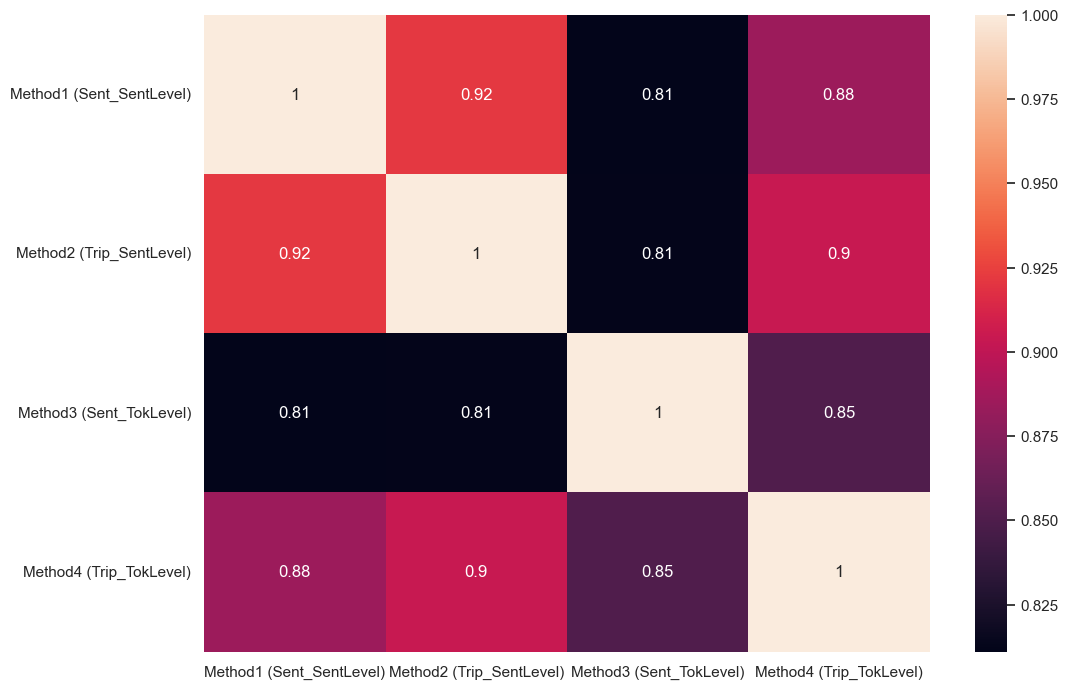

In [42]:
corr_matrix = df_new.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr_matrix, annot=True)

In [44]:
corr_matrix

,Method1 (Sent_SentLevel),Method2 (Trip_SentLevel),Method3 (Sent_TokLevel),Method4 (Trip_TokLevel)
Method1 (Sent_SentLevel),1.000000,0.921725,0.811009,0.884761
Method2 (Trip_SentLevel),0.921725,1.000000,0.812059,0.903413
Method3 (Sent_TokLevel),0.811009,0.812059,1.000000,0.850292
Method4 (Trip_TokLevel),0.884761,0.903413,0.850292,1.000000
